In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix



## Loading the dataset

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 33% 5.00M/15.1M [00:00<00:00, 27.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 65.0MB/s]


In [4]:

import zipfile
zip_file = zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip')
zip_file.extractall('/content')
zip_file.close()

In [5]:
import os
yes_folder_path = '/content/brain_tumor_dataset/yes'
no_folder_path = '/content/brain_tumor_dataset/no'

folder_no = os.listdir(no_folder_path)
folder_yes = os.listdir(yes_folder_path)

print(len(folder_no))
print(len(folder_yes))

98
155


In [6]:
no_label =[0]*len(folder_no)
yes_label = [1]*len(folder_yes)

label = no_label + yes_label

In [7]:
len(no_label)

98

In [8]:
len(yes_label)

155

In [9]:
from PIL import Image
data = []

for img in folder_no:
    image = Image.open('/content/brain_tumor_dataset/no/'+img)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img in folder_yes:
    image = Image.open('/content/brain_tumor_dataset/yes/'+img)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


In [10]:
x = np.array(data)
y = np.array(label)


In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state = 100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(215, 224, 224, 3)
(38, 224, 224, 3)
(215,)
(38,)


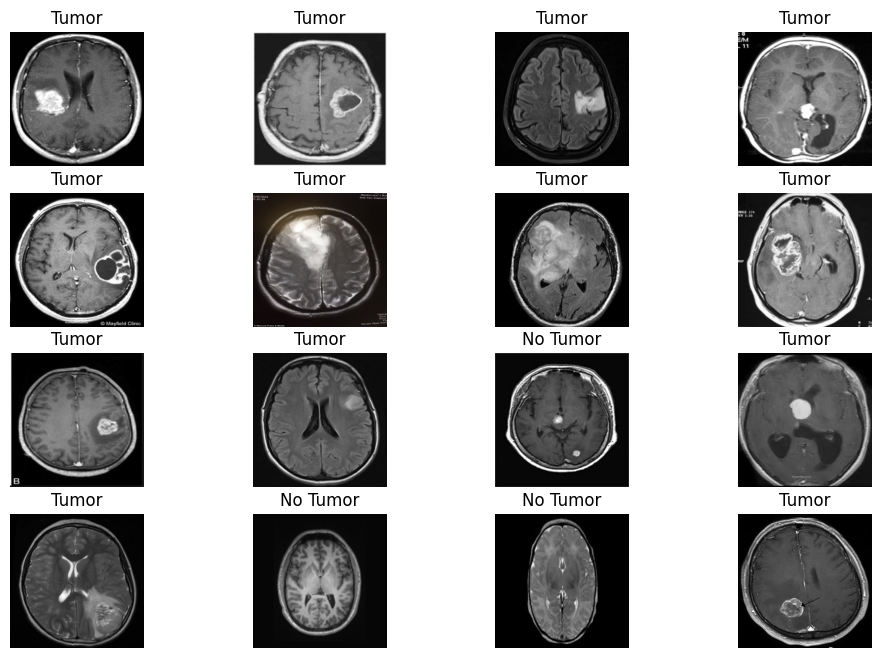

In [13]:
class_list = ['No Tumor','Tumor']
plt.figure(figsize = (12,8))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_list[y_train[i]])
    plt.axis('off')
plt.show()

In [14]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

## 1. Custom CNN Model

In [15]:
from keras.src.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(3,kernel_size = (3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(2,2))
BatchNormalization()

model.add(Conv2D(3,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
BatchNormalization()

model.add(Flatten()) # Flatten (2D to 1D)
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(32,activation = 'relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 3)       84        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 3)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 3)       84        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 3)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8748)              0         
                                                                 
 dense (Dense)               (None, 64)                5

In [20]:
"""early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    restore_best_weights=False
)
"""

'early_stop = tf.keras.callbacks.EarlyStopping(\n    monitor="val_accuracy",\n    patience=10,\n    restore_best_weights=False\n)\n'

In [16]:
history = model.fit(x_train_scaled, y_train, epochs=16,
                   validation_data=(x_test_scaled,y_test))

Epoch 1/16
7/7 [==============================] - 15s 104ms/step - loss: 0.7056 - accuracy: 0.6047 - val_loss: 0.5995 - val_accuracy: 0.6053
Epoch 2/16
7/7 [==============================] - 0s 29ms/step - loss: 0.6085 - accuracy: 0.6651 - val_loss: 0.5392 - val_accuracy: 0.7632
Epoch 3/16
7/7 [==============================] - 0s 24ms/step - loss: 0.5305 - accuracy: 0.7767 - val_loss: 0.5115 - val_accuracy: 0.7105
Epoch 4/16
7/7 [==============================] - 0s 24ms/step - loss: 0.4428 - accuracy: 0.8140 - val_loss: 0.5128 - val_accuracy: 0.7895
Epoch 5/16
7/7 [==============================] - 0s 25ms/step - loss: 0.4966 - accuracy: 0.8000 - val_loss: 0.4653 - val_accuracy: 0.8158
Epoch 6/16
7/7 [==============================] - 0s 30ms/step - loss: 0.4578 - accuracy: 0.8047 - val_loss: 0.4523 - val_accuracy: 0.8421
Epoch 7/16
7/7 [==============================] - 0s 26ms/step - loss: 0.4098 - accuracy: 0.8279 - val_loss: 0.4414 - val_accuracy: 0.8158
Epoch 8/16
7/7 [=========

In [17]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.4 MB/s eta 0:00:00


In [18]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='/content/output.png') # write to disk
visualkeras.layered_view(model, to_file='/content/output.png').show() # write and show

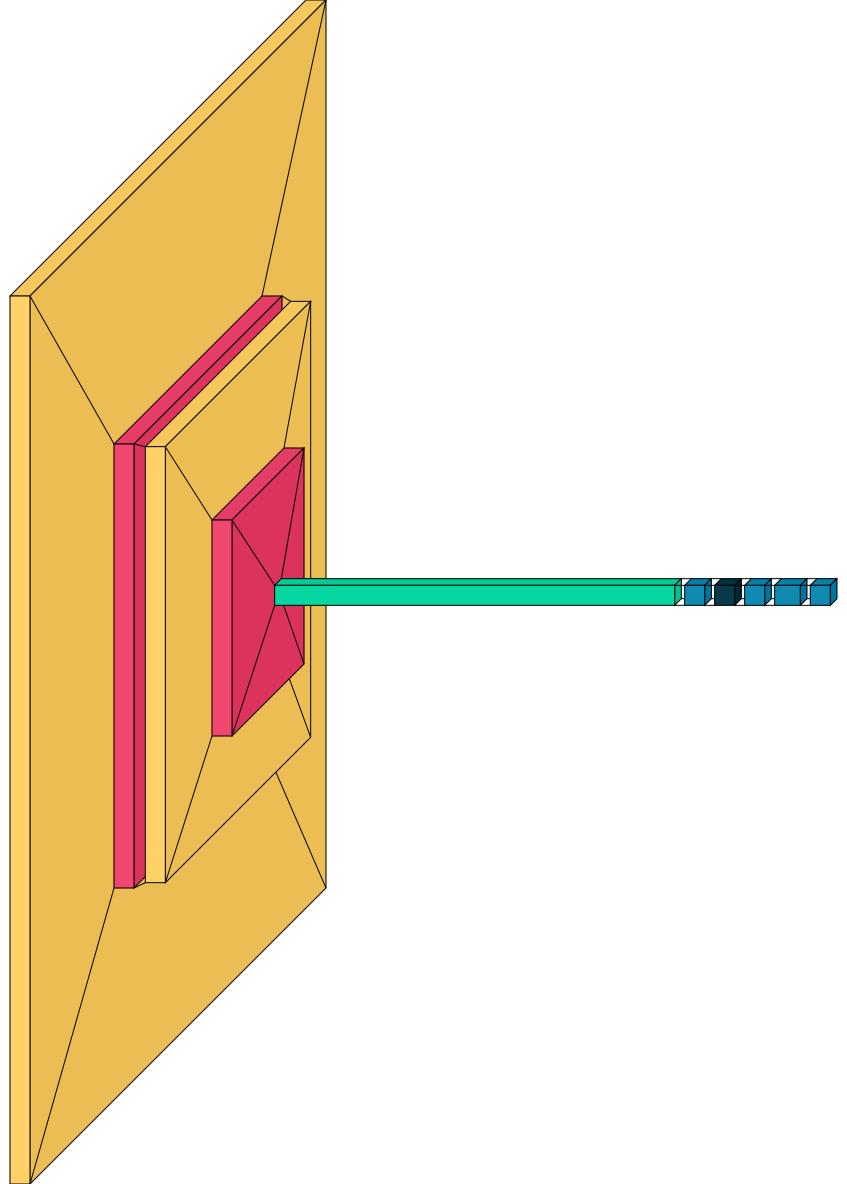

In [19]:
visualkeras.layered_view(model)

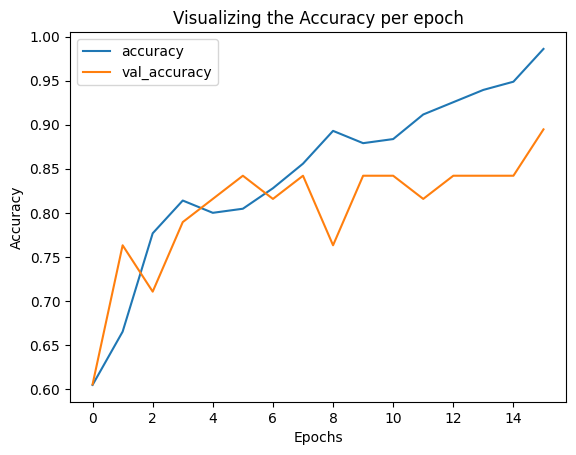

In [20]:
history_df = pd.DataFrame(model.history.history)
plt.plot(history_df['accuracy'],label = 'accuracy')
plt.plot(history_df['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing the Accuracy per epoch')
plt.show()

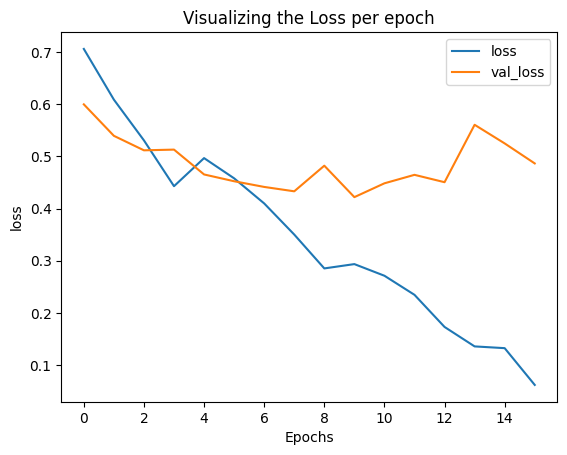

In [21]:
plt.plot(history_df['loss'],label = 'loss')
plt.plot(history_df['val_loss'],label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Visualizing the Loss per epoch')
plt.show()

In [22]:
print('Test accuracy : ',model.evaluate(x_test_scaled,y_test))

2/2 [==============================] - 0s 14ms/step - loss: 0.4864 - accuracy: 0.8947
Test accuracy :  [0.48638996481895447, 0.8947368264198303]


In [53]:
y_pred = model.predict(x_test_scaled)
y_pred = [1 if i>=0.5 else 0 for i in y_pred]

2/2 [==============================] - 0s 8ms/step


In [65]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print()
print("Classification Report:\n",classification_report(y_test,y_pred1))

Confusion Matrix:
 [[13  2]
 [ 1 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.92      0.96      0.94        23

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.92        38
weighted avg       0.92      0.92      0.92        38



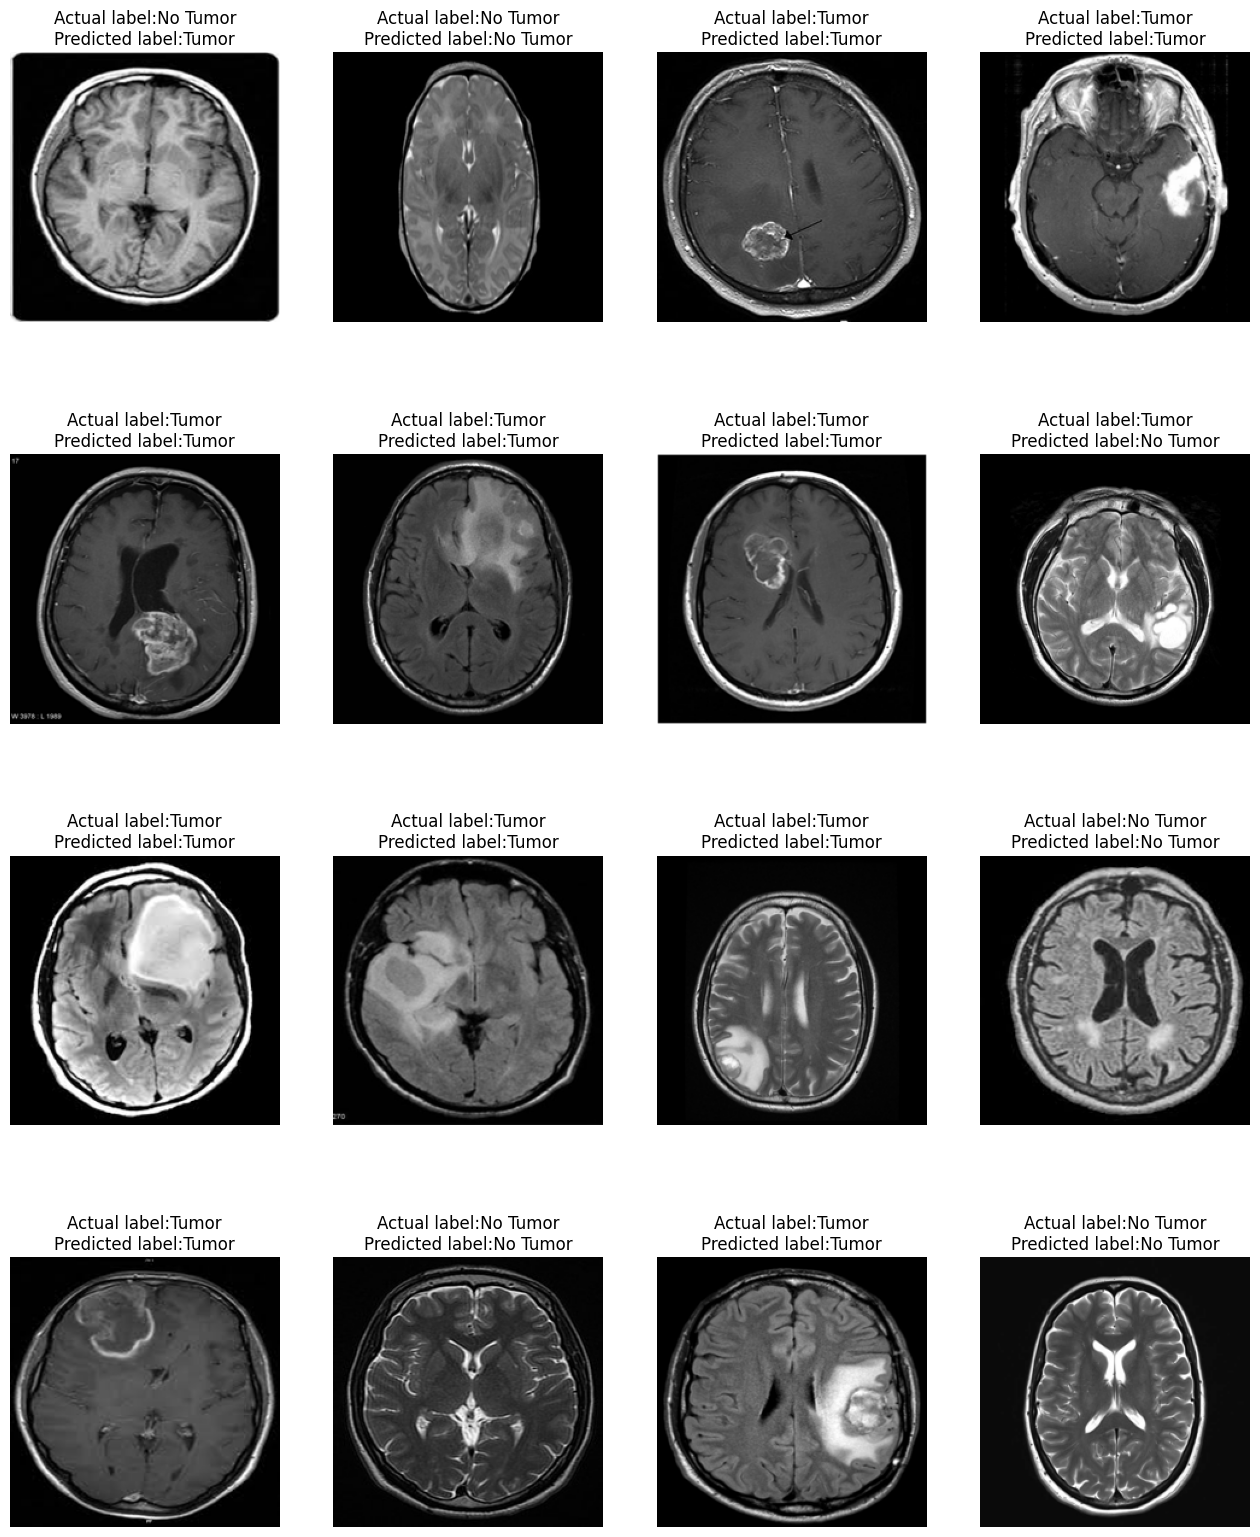

In [54]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred[i]]}")
    plt.axis("off")

## 2.VGG-16

In [36]:
conv_vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
)

58889256/58889256 [==============================] - 0s 0us/step


In [37]:
model1 = Sequential()
model1.add(conv_vgg16)
model1.add(Flatten()) # Flatten (2D to 1D)
model1.add(Dense(units=64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=128, activation='relu'))
#model1.add(Dropout(0.5))
model1.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model1.add(Dense(units=1, activation='sigmoid'))
model1.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_7 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 1)                

In [46]:
visualkeras.layered_view(model1).show() # display using your system viewer
visualkeras.layered_view(model1, to_file='/content/output_vgg16.png') # write to disk
visualkeras.layered_view(model1, to_file='/content/output_vgg16.png').show() # write and show

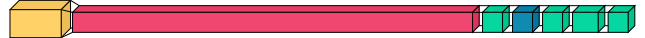

In [47]:
visualkeras.layered_view(model1)

In [41]:
history4 = model1.fit(x_train_scaled, y_train, epochs=10,
                   validation_data=(x_test_scaled,y_test))

Epoch 1/10
7/7 [==============================] - 3s 455ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 1.0942 - val_accuracy: 0.8684
Epoch 2/10
7/7 [==============================] - 3s 419ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1512 - val_accuracy: 0.8421
Epoch 3/10
7/7 [==============================] - 3s 443ms/step - loss: 0.0196 - accuracy: 0.9860 - val_loss: 1.1922 - val_accuracy: 0.8684
Epoch 4/10
7/7 [==============================] - 3s 434ms/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 1.0908 - val_accuracy: 0.8684
Epoch 5/10
7/7 [==============================] - 3s 428ms/step - loss: 0.0184 - accuracy: 0.9907 - val_loss: 1.0997 - val_accuracy: 0.8684
Epoch 6/10
7/7 [==============================] - 3s 432ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.8252 - val_accuracy: 0.8947
Epoch 7/10
7/7 [==============================] - 3s 455ms/step - loss: 0.0155 - accuracy: 0.9907 - val_loss: 0.7810 - val_accuracy: 0.8947
Epoch 8/10
7/7 [====

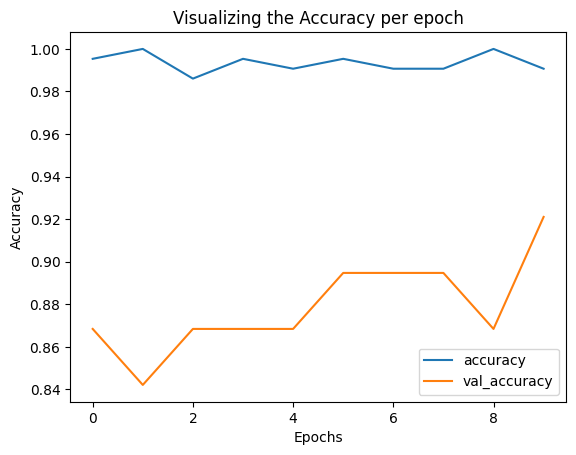

In [44]:
history_df_4 = pd.DataFrame(history4.history)
plt.plot(history_df_4['accuracy'],label = 'accuracy')
plt.plot(history_df_4['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing the Accuracy per epoch')
plt.show()

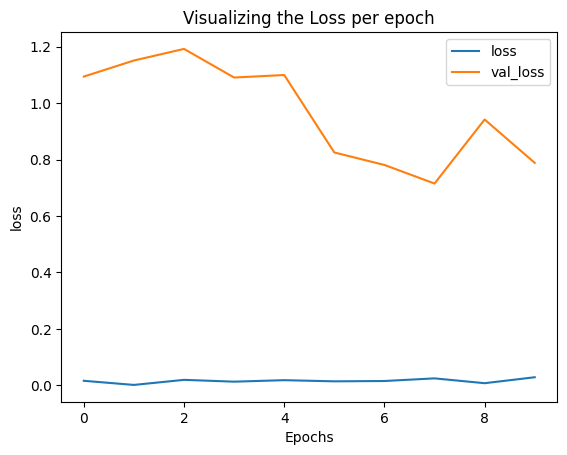

In [45]:
plt.plot(history_df_4['loss'],label = 'loss')
plt.plot(history_df_4['val_loss'],label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Visualizing the Loss per epoch')
plt.show()

In [57]:
y_pred1 = model1.predict(x_test_scaled)
y_pred1 = [1 if i>=0.5 else 0 for i in y_pred1]

2/2 [==============================] - 0s 155ms/step


In [64]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print()
print("Classification Report:\n",classification_report(y_test,y_pred1))

Confusion Matrix:
 [[13  2]
 [ 1 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.92      0.96      0.94        23

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.92        38
weighted avg       0.92      0.92      0.92        38



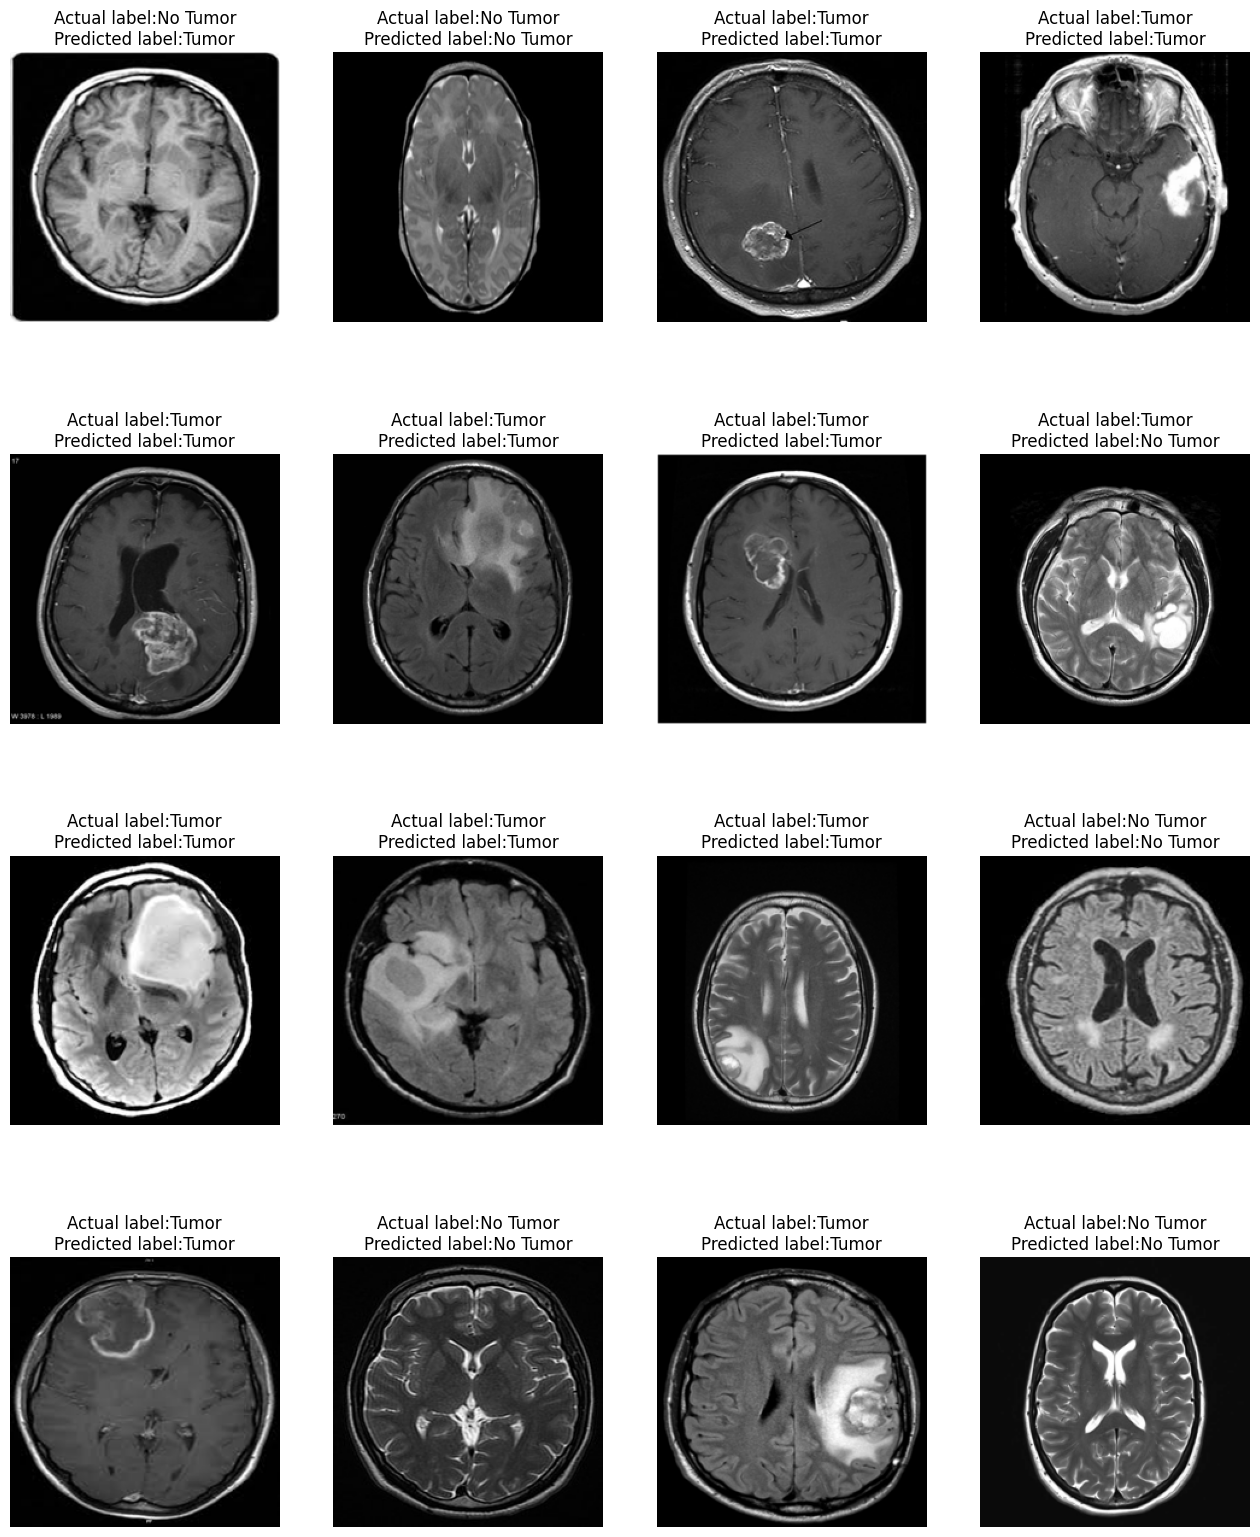

In [58]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred1[i]]}")
    plt.axis("off")

## 3.Efficent Model using Tensorflow_hub

In [23]:
import tensorflow_hub as hub
path = "https://tfhub.dev/google/efficientnet/b0/classification/1" # 224x224x3
efficient_model = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)


eff_model = Sequential()
eff_model.add(efficient_model)
eff_model.add(Dense(units=1, activation="sigmoid"))

eff_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              5330564   
                                                                 
 dense_4 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 5331565 (20.34 MB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 5330564 (20.33 MB)
_________________________________________________________________


In [49]:
visualkeras.layered_view(eff_model).show() # display using your system viewer
visualkeras.layered_view(eff_model, to_file='/content/output_eff.png') # write to disk
visualkeras.layered_view(eff_model, to_file='/content/output_eff.png').show() # write and show

In [50]:
visualkeras.layered_view(eff_model)

In [24]:
eff_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [25]:
history1 =eff_model.fit(x_train_scaled, y_train, epochs=14,
                   validation_data=(x_test_scaled,y_test))

Epoch 1/14
7/7 [==============================] - 8s 675ms/step - loss: 0.8978 - accuracy: 0.5163 - val_loss: 0.6298 - val_accuracy: 0.6842
Epoch 2/14
7/7 [==============================] - 1s 77ms/step - loss: 0.6489 - accuracy: 0.6465 - val_loss: 0.4690 - val_accuracy: 0.8421
Epoch 3/14
7/7 [==============================] - 1s 77ms/step - loss: 0.5210 - accuracy: 0.7349 - val_loss: 0.3750 - val_accuracy: 0.8684
Epoch 4/14
7/7 [==============================] - 1s 88ms/step - loss: 0.4385 - accuracy: 0.8140 - val_loss: 0.3194 - val_accuracy: 0.9474
Epoch 5/14
7/7 [==============================] - 1s 86ms/step - loss: 0.3850 - accuracy: 0.8744 - val_loss: 0.2840 - val_accuracy: 0.9737
Epoch 6/14
7/7 [==============================] - 1s 76ms/step - loss: 0.3481 - accuracy: 0.8837 - val_loss: 0.2629 - val_accuracy: 0.9737
Epoch 7/14
7/7 [==============================] - 1s 87ms/step - loss: 0.3163 - accuracy: 0.9023 - val_loss: 0.2528 - val_accuracy: 0.9474
Epoch 8/14
7/7 [==========

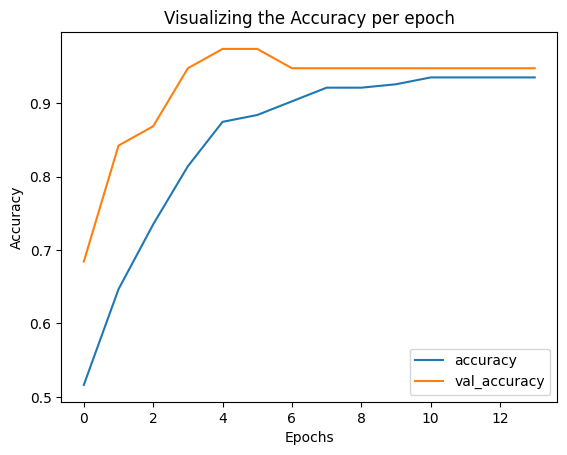

In [26]:
history_df1 = pd.DataFrame(history1.history)
plt.plot(history_df1['accuracy'],label = 'accuracy')
plt.plot(history_df1['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing the Accuracy per epoch')
plt.show()

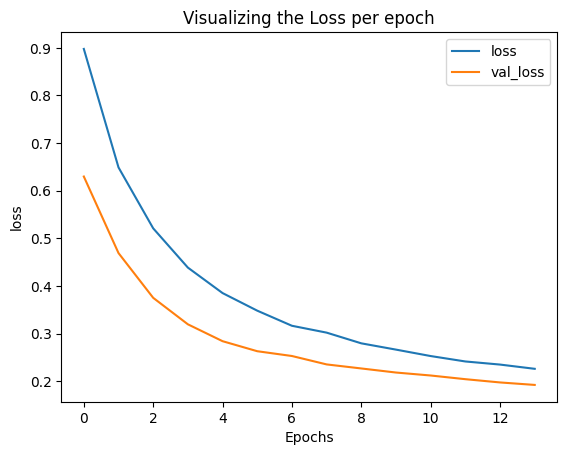

In [27]:
plt.plot(history_df1['loss'],label = 'loss')
plt.plot(history_df1['val_loss'],label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Visualizing the Loss per epoch')
plt.show()

In [59]:
y_pred2 = eff_model.predict(x_test_scaled)
y_pred2 = [1 if i>=0.5 else 0 for i in y_pred2]

2/2 [==============================] - 1s 70ms/step


In [66]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))
print()
print("Classification Report:\n",classification_report(y_test,y_pred2))

Confusion Matrix:
 [[14  1]
 [ 1 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.96      0.96      0.96        23

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



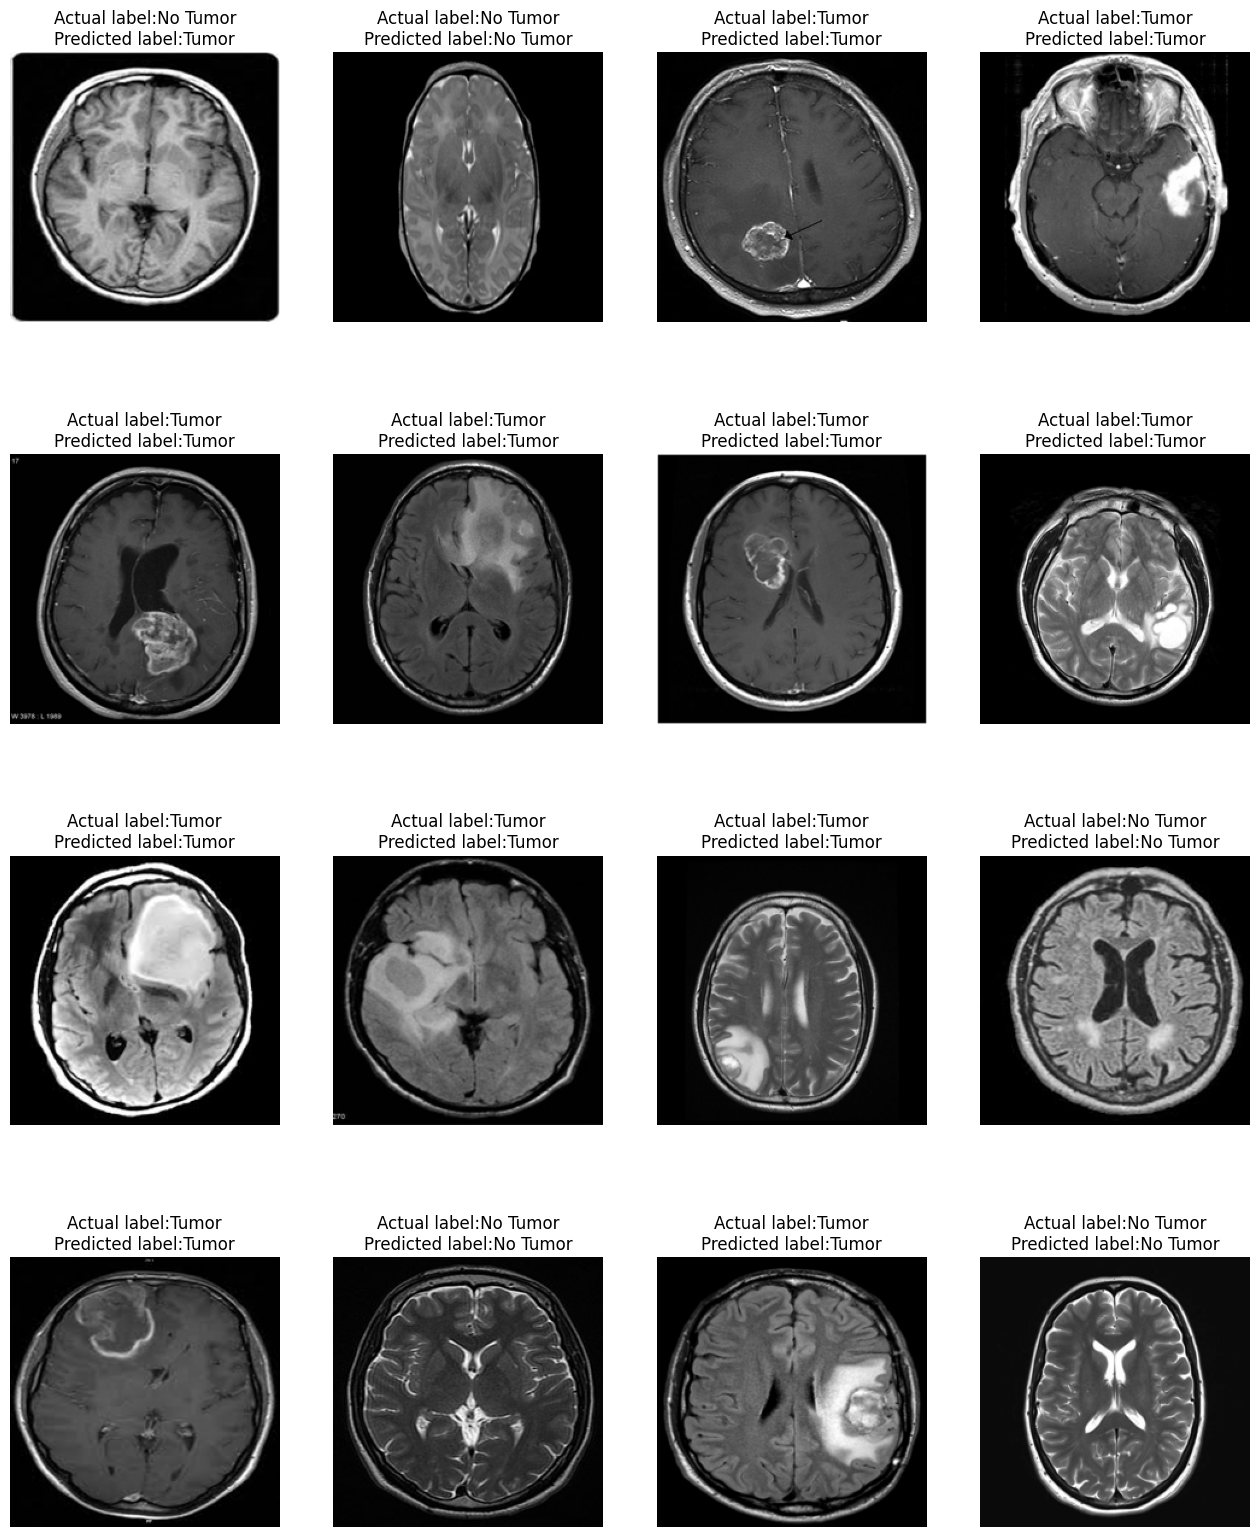

In [60]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred2[i]]}")
    plt.axis("off")

## 4.ResNet_152

In [31]:
import tensorflow_hub as hub
path = "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/5" # 224x224x3
efficient_model_2 = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)


eff_model_2 = Sequential()
eff_model_2.add(efficient_model_2)
eff_model_2.add(Dense(units=1, activation="sigmoid"))

eff_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              60346281  
                                                                 
 dense_6 (Dense)             (None, 1)                 1002      
                                                                 
Total params: 60347283 (230.21 MB)
Trainable params: 1002 (3.91 KB)
Non-trainable params: 60346281 (230.20 MB)
_________________________________________________________________


In [32]:
eff_model_2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [51]:
visualkeras.layered_view(eff_model_2).show() # display using your system viewer
visualkeras.layered_view(eff_model_2, to_file='/content/output_eff.png') # write to disk
visualkeras.layered_view(eff_model_2, to_file='/content/output_eff.png').show() # write and show

In [52]:
visualkeras.layered_view(eff_model_2)

In [33]:
history2 =eff_model_2.fit(x_train_scaled, y_train, epochs=14,
                   validation_data=(x_test_scaled,y_test))

Epoch 1/14
7/7 [==============================] - 17s 857ms/step - loss: 1.1966 - accuracy: 0.4558 - val_loss: 1.0625 - val_accuracy: 0.5526
Epoch 2/14
7/7 [==============================] - 2s 267ms/step - loss: 0.7594 - accuracy: 0.6279 - val_loss: 0.6599 - val_accuracy: 0.5789
Epoch 3/14
7/7 [==============================] - 2s 261ms/step - loss: 0.5507 - accuracy: 0.7163 - val_loss: 0.5051 - val_accuracy: 0.8158
Epoch 4/14
7/7 [==============================] - 2s 258ms/step - loss: 0.4521 - accuracy: 0.7814 - val_loss: 0.4284 - val_accuracy: 0.8421
Epoch 5/14
7/7 [==============================] - 2s 265ms/step - loss: 0.3787 - accuracy: 0.8279 - val_loss: 0.3692 - val_accuracy: 0.8421
Epoch 6/14
7/7 [==============================] - 2s 259ms/step - loss: 0.3340 - accuracy: 0.8558 - val_loss: 0.3676 - val_accuracy: 0.8421
Epoch 7/14
7/7 [==============================] - 2s 267ms/step - loss: 0.3044 - accuracy: 0.8791 - val_loss: 0.3716 - val_accuracy: 0.8421
Epoch 8/14
7/7 [===

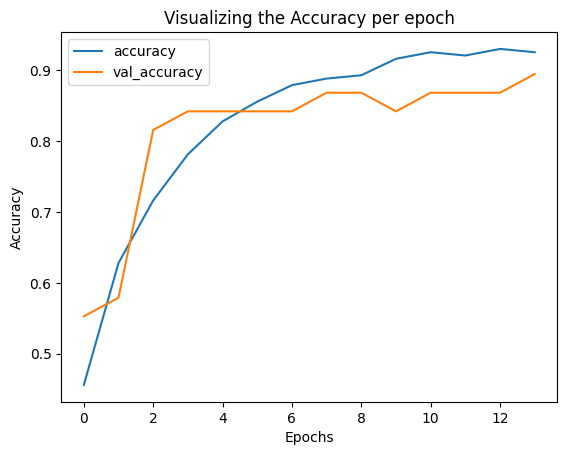

In [34]:
history_df2 = pd.DataFrame(history2.history)
plt.plot(history_df2['accuracy'],label = 'accuracy')
plt.plot(history_df2['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing the Accuracy per epoch')
plt.show()

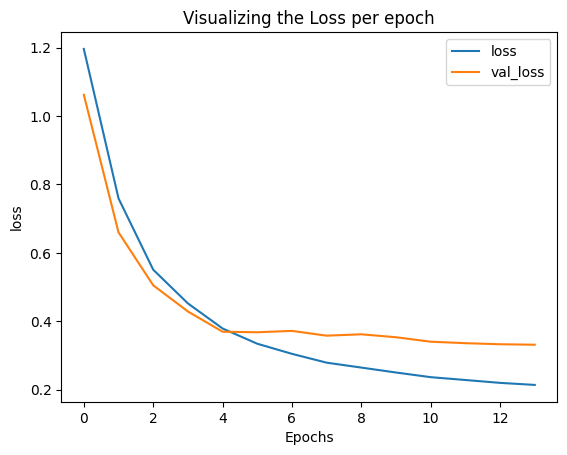

In [35]:
plt.plot(history_df2['loss'],label = 'loss')
plt.plot(history_df2['val_loss'],label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Visualizing the Loss per epoch')
plt.show()

In [68]:
y_pred3 = eff_model_2.predict(x_test_scaled)
y_pred3 = [1 if i>=0.5 else 0 for i in y_pred3]

2/2 [==============================] - 2s 251ms/step


In [69]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred3))
print()
print("Classification Report:\n",classification_report(y_test,y_pred3))

Confusion Matrix:
 [[13  2]
 [ 2 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.91      0.91      0.91        23

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



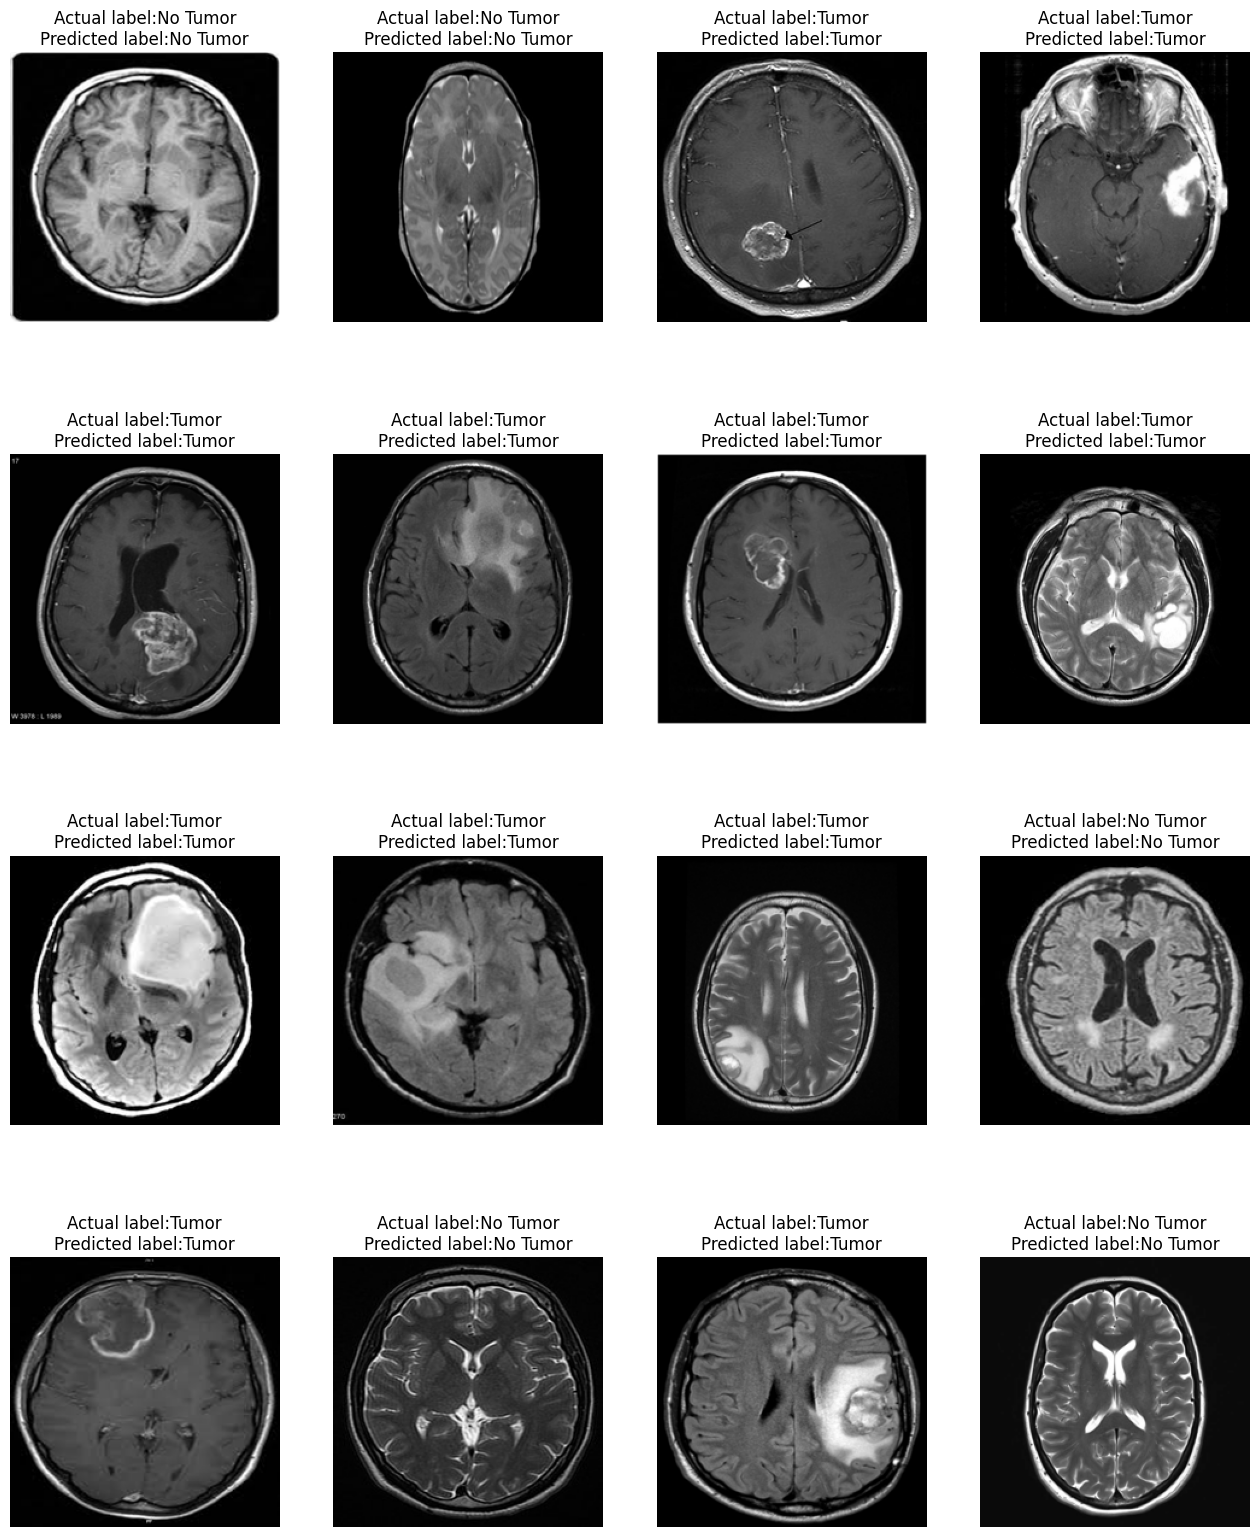

In [70]:
class_labels=["No Tumor","Tumor"]
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual label:{class_labels[y_test[i]]}\nPredicted label:{class_labels[y_pred3[i]]}")
    plt.axis("off")